## Assessment2 CNN 

## Practical Exploration of Hebbian Learning - Part 1

- **(2-4):** Run your implementation of the Hebb rule on `data_HL_simple.txt`, and inspect the weights $w$ after every step of the algorithm. Identify the correlational pattern that the algorithm discovers. Are there any positively or negatively correlated features in these data according to the pattern seen in $w$?

After multiple computation of the new weight, we notice 3 different correlation:
    1: Outputs 0, 1, 2, and 3 are positive correlated, they are either all positive or all negative.
    2: The four first values are negative correlated with the last value. When the first values are positive, the last one is negative and vice versa.
    3: Outputs 2 and 3 are positive carrelated, they are very similar to each other.


In [25]:
import numpy as np


# load data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
print(data[1:5,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:

        # compute the linear activation, use the dot() function from numpy to multiply the two array (w = weight and x = one array from data)
        y_j = np.dot(w, x)

        # compute the Simple Hebbian rule, multiply the array x (data) with y_j (linear activation calculated previously), and multiply it with epsilon (learning rate)
        hebb = epsilon * y_j * x

        # update the weights by adding the result of the Hebian rule with the old weight
        w = w + hebb


        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(w)


[[-1.  0. -1. -1.  1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  0.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]]
initial weights
[ 0.03530203  0.02474569 -0.51594166 -0.73705723 -0.4430591 ]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[ 0.00164315  0.00738685 -0.57651629 -0.79763185 -0.38248448]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-0.02012892 -0.00384225 -0.62906251 -0.85017808 -0.32993825]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-0.02081886 -0.00441551 -0.67714504 -0.8982606  -0.28185573]
	Current input: [ 0.  0.  1.  1. -1.]
New Weights:
[-0.00553025 -0.01780742 -0.77598042 -0.99709598 -0.18302035]
	Current input: [ 1.  1.  1.  1. -1.]
New Weights:
[-0.04518612 -0.00263245 -0.89740037 -1.11851594 -0.06160039]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[-0.1326124  -0.04798183 -1.05079991 -1.27191548  0.09179915]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-0.19402034 -0.08084271 -1.18231055 -1.40342612  0.22330978]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-0.201

### Question 3 - Oja's Rule

all principal components:
[[0.01640681 0.02155885 0.40640946 0.4106701  0.81574963]]


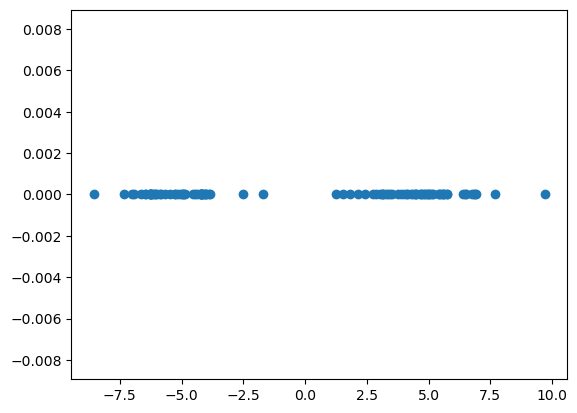

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))
# print("original data")
# print(data)

# do PCA and show the data in 1D
plt.figure(1)
pca = PCA(n_components=1)
# fit the model parameters
pca.fit(data)
print("all principal components:")
print(pca.components_)
# project the data to the new dimension
data_pca = pca.transform(data)
# a vector of zeros for the scatter plot
yaxis = np.zeros(data_pca.shape[0])
plt.scatter(data_pca[:,0], yaxis)
plt.show()

- **(3-4):** The next step requires coding. Extend the code that implements simple Hebbian learning above and implement Oja's rule to learn one principal component for these data. We are interested in exactly one principal component in this exercise. Your implementation of Oja's rule should appear in the Python block below.

In [27]:
# Implement Oja's rule here extending your previous implementation
# of the simple Hebb rule. Note that this question on Oja's rule
# uses a different dataset. So, don't forget to change the dataset
# after you have copied the code to this block.

import numpy as np


# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))
print(data[1:5,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:

        # compute the linear activation, use the dot() function from numpy to multiply the two array (w = weight and x = one array from data)
        y_j = np.dot(w, x)

        # compute the Oja’s normalization rule, 
        # First, multiply the array x (data) with y_j (linear activation calculated previously)
        # Second, multiply the array x  with y_j squared
        # Finally, subtract the first and the second step, and multiply the result with epsilon 
        oja = epsilon * ((y_j * x) - (y_j**2 * w))

        # update the weights by adding the result of the Oja’s normalization rule with the old weight
        w = w + oja

        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(w)

[[-0.20752314 -0.36773773  1.22059844  0.55048877  1.88427215]
 [-1.57125555  1.32390861 -1.47812951 -1.43172722 -3.19127369]
 [-0.82290562  2.27103446 -2.12484964 -2.12484964 -4.13049738]
 [ 0.97027764  0.91336865 -3.52387133 -3.22573866 -6.63143683]]
initial weights
[-0.41851993 -0.15838931  0.09469572  0.08933236  0.10538525]
	Current input: [-0.14225842  0.92044523 -1.62046158 -1.62046158 -3.44263005]
New Weights:
[-0.22969166 -0.16006168  0.35634955  0.34378201  0.65635554]
	Current input: [ 1.04787451 -0.18319438  0.8286063   2.55352384  3.10636035]
New Weights:
[-0.02823477 -0.02513972  0.41591796  0.39952284  0.82264504]
	Current input: [-0.64991566  0.56822123  4.02756301  4.02756301  8.35542888]
New Weights:
[-0.06732398  0.05672893  0.39917106  0.39864149  0.82794366]
	Current input: [ 1.17858979 -0.62115521  2.18768608  2.18768608  4.23762284]
New Weights:
[ 0.07010628 -0.03317625  0.39781174  0.41983508  0.81611932]
	Current input: [ 0.43291965 -1.92305982  2.43448814  2.4

- **(3-5):** Run your implementation of Oja's rule on `data_two_groups.txt`. Use the vector of parameters $w$ that you will obtain using Oja's rule to project the original five-dimensional data into 1 dimension defined by $w$. The image that you will obtain should be similar to the one produced by PCA in `sklearn` above. The images may be identical if you have run Oja's rule until convergence, but this is not guaranteed. This step will allow you to see very clearly how a low dimensional representation (and hence data compression) can be achieved using Hebbian learning/Oja's rule or PCA.

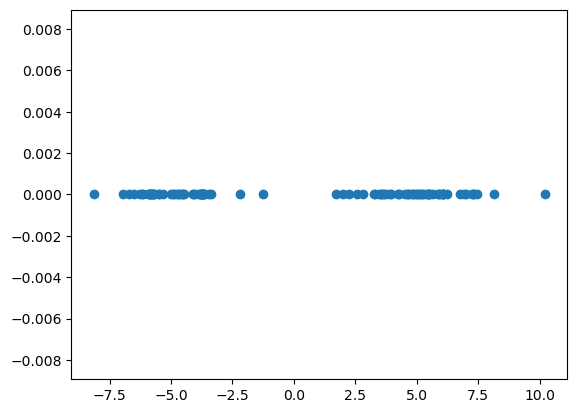

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

new_data = []

for x in data:
    new_data.append(sum(w * x))

plt.figure(1)
yaxis = np.zeros(len(new_data))
plt.scatter(new_data, yaxis)
plt.show()

## Practical Exploration of Hebbian Learning - Part 2

## Question 1 - PCA Applied to Iris Data

The PCA implementation in this section is based on this example:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html#sphx-glr-auto-examples-decomposition-plot-incremental-pca-py

In [29]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load the data from sklearn
iris = load_iris()

# X is np.ndarray and it contains four predictor attributes
X = iris.data
y = iris.target

# print descriptive statistics using pandas data frame
df_X = pd.DataFrame(X)
print(df_X.describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [30]:
# the number of principal components
n_components = 2

pca = PCA(n_components=n_components)

# We fit the model and then transform the data.

# Fit the model to the data; this is where PCA will do what Hebbian learning does to compute one principal component
pca.fit(X)

# print the principal components
print(pca.components_)

# we can now transform the data and project it to 2 dimensions.
X_pca = pca.transform(X)

print(X_pca[:5,:])
print(X[:5,:])

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


- **(1-2):** In the above code, identify Python variables that correspond to the symbol $y_j$ in our lecture notes. What is the range of $j$ in this example? How does the number of values of $y_j$ relate to the number of data examples?

In the above code, y_j is represented by X_pca. The range of j is from 0 to 149. The number of values y_j reprensente the number of data, which is 150.

## Question 3 - Scatterplot for Reconstruction Errors

[[1.03073034 0.50488764]
 [0.73073034 0.35488764]
 [1.21073034 0.50488764]
 [1.46073034 1.55488764]
 [0.66073034 0.50488764]]
the parameters/axis
[[0.86285419 0.50545291]]
data_pca is the 1D representation of our data:
[[0.80989272]
 [1.29988067]
 [2.04631978]
 [0.82531087]]


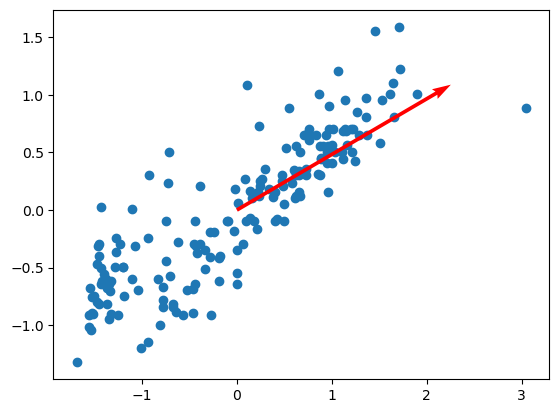

In [31]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np

wine = load_wine()
#dfwine = pd.DataFrame(wine.data, columns=wine.feature_names)
#print(dfwine.corr())

# we select 2 features that are correlated in this dataset
ind = [wine['feature_names'].index('flavanoids'), wine['feature_names'].index('total_phenols')]
data = wine.data[:,ind]
# we centre the data to make the code below simpler
data = data - np.mean(data, axis=0)
print(data[0:5,:])

# we will extract 1 component; note that our data is 2D
n_components = 1

pca = PCA(n_components=n_components)

# We fit the model and transform the data in one line.
data_pca = pca.fit_transform(data)
print("the parameters/axis")
print(pca.components_)
print("data_pca is the 1D representation of our data:")
print(data_pca[1:5])

# plot the data with the first PC
plt.scatter(data[:,0], data[:,1])
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)
plt.show()

# data is the original data, and data_pca is the low dimensional representation of the data
# your next step is to compute data_rec, which will be the reconstruction of the original data using data_pca
# we are interested in the errors between data and data_rec



- **(3-1)** Compute `data_rec`, which is the reconstruction of the original data from its compressed 1D representation that is stored in `data_pca`.

0.037332280636671246


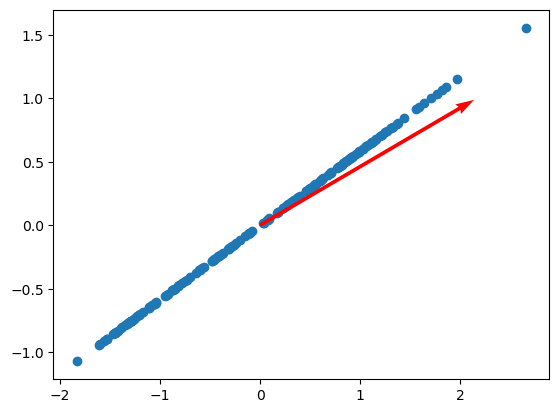

In [32]:
# use pca.inverse_transform to obtain the projected data, which is the reconstruction of the original data (data_rec)
data_rec = pca.inverse_transform(data_pca)

# compute the error between data and data_rec using the mean squared error
error = ((data - data_rec) ** 2).mean()
print(error)

plt.scatter(data_rec[:,0], data_rec[:,1])
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)
plt.show()

## Part 3: Question 

#### This question will require the students to engage with the scientific literature. The challenge is to compare the Delta Rule with the Perceptron learning algorithm. The comparison should highlight two differences of both methods. The differences can be related to both how these algorithms work and the properties of the learned models. A technical explanation is required, that is, every difference must be explained using technical terms. Cite the sources that will be used to answer this question. Use books or peer-reviewed scientific papers published in journals or conference-proceedings (blogs and websites are not in this category).
</br></br>


The first difference is the activation function. In one hand, [1] and [3] agree that the Delta Rule uses
a continuous and differentiable activation function, like the sigmoid function. In order to update the
weights and bias using gradient descent, the error function must be differentiable. On the other
hand, the Perceptron use a different type of function activation, they did not use gradient descent
method, it generally utilizes a binary activation function or step function. Rosenblatt as cited in [4]
claims that… [4] use the essay of Rosenblatt and notice that ‘The outputs of the first layer feed a
second layer, which consiste of a single adaptive linear threshold element. More than the
convention that its input signals were {I, 0} binary, and that no bias weight was included.’, which
prove that Perceptron usually works with binary activation. In addition [5] agrees with the binary
activation.
</br></br>

The second change is the learning Rule. As described in the first paragraph, Delta Rule uses the
gradient descent algorithm. [1], [2] and [4] consent that the gradient rules change the weights and
bias on each demonstration, based on the by meansquare error between the final and the desired
output. However, [5] and [4] agrees that perceptron uses a simple learning rule. [4] explains its
process by saying that the weights and bias are altered, to make the prediction more accurate, only
if the final output is different from the desired output.


## References

[1] Mutasem khalil Alsmadi, Khairuddin Bin Omar, Shahrul Azman Noah, Ibrahim Almarashdah 2009.
Performance Comparison of Multi-layer Perceptron (Back Propagation, Delta Rule and Perceptron)
algorithms in Neural Networks. Available at : < https://ieeexplore.ieee.org/abstract/document/4809024 > [Accessed 9th Jan 2023]
</br>
[2] Thad A. Polk, Colleen M. Seifert 2002. Cognitive Modeling p.393. Available at : < https://books.google.ca/books?hl=fr&lr=&id=FJblV_iOPjIC&oi=fnd&pg=PA213&dq=Learning+repres
entations+by+back-propagating+errors&ots=z-Jm1hIVRR&sig=vDCc_-TpAok3DvHW6e8xrFQcf8&redir_esc=y#v=snippet&q=delta%20rule&f=false > [Accessed 9th Jan 2023]
</br>
[3] Dean A. Pomerleau 1987. The Meta-Generalized Delta Rule: A New Algorithm for Learning in
Connectionist Networks. Available at : < https://apps.dtic.mil/sti/pdfs/ADA218859.pdf > [Accessed 9th Jan 2023]
</br>
[4] B. Widrow, Michael Lehr 1990. 30 years of adaptive neural networks: Perceptron, Madaline, and
backpropagation. Available at : < https://www.researchgate.net/publication/2984342_30_years_of_adaptive_neural_networks_Perc
eptron_Madaline_and_backpropagation > [Accessed 9th Jan 2023]
</br>
[5] Peter Auera, Harald Burgsteinerb, Wolfgang Maassc 2008. A learning rule for very simple
universal approximators consisting of a single layer of perceptrons. Available at : < https://igiweb.tugraz.at/PDF/126.pdf > [Accessed 9th Jan 2023]

## References

O'Reilly, Randall C., and Yuko Munakata. Computational explorations in cognitive neuroscience: Understanding the mind by simulating the brain. MIT press, 2000.